In [2]:
!pip install nbformat

In [3]:
!pip install graphviz

In [4]:
!pip install dtreeviz

In [5]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('notebook')
sns.set_style('white')

import dtreeviz

In [6]:
training = pd.read_csv("/Users/oindrikar/Desktop/CyberSec/Dataset/UNSW_NB15_training-set.csv")
testing = pd.read_csv("/Users/oindrikar/Desktop/CyberSec/Dataset/UNSW_NB15_testing-set.csv")
print("training ",training.shape)
print("testing ",testing.shape)

training  (82332, 45)
testing  (175341, 45)


In [7]:
all(training.columns == testing.columns)

True

In [8]:
df = pd.concat([training,testing]).drop('id',axis=1)
df = df.reset_index(drop=True)

df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [9]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [11]:
df.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

Categorical Data

In [12]:
for col in ['proto', 'service', 'state']:
    df[col] = df[col].astype('category').cat.codes
    
df['attack_cat'] = df['attack_cat'].astype('category')

In [13]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,119,0,5,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,119,0,5,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


Visualizing attacks categories

attack_cat
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Normal                0
Name: count, dtype: int64


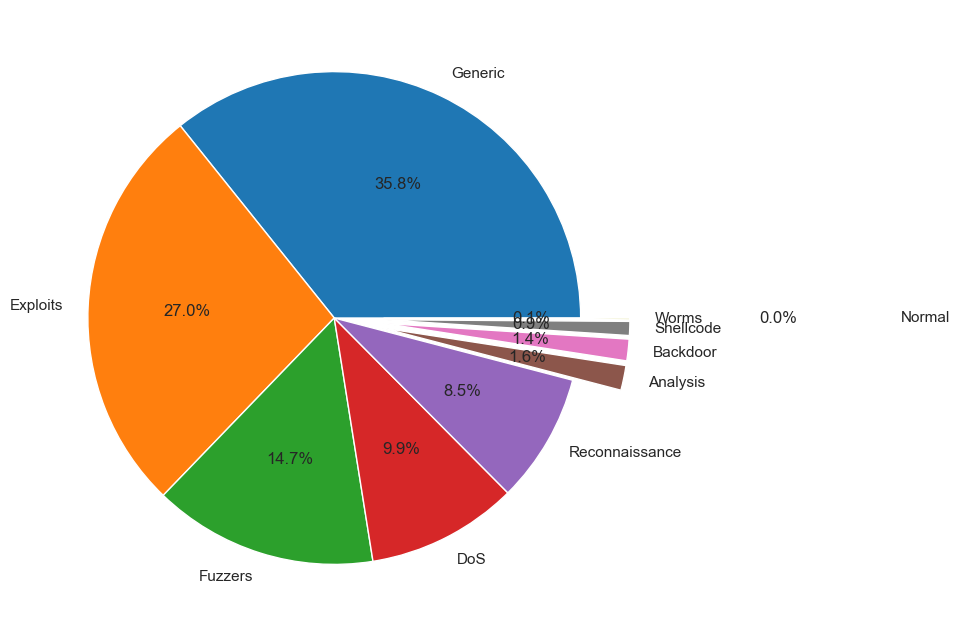

In [14]:
validAttacks = df[df['label']==1]['attack_cat'].value_counts()
print(validAttacks)

plt.figure(figsize = (15,8))
plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,1.2])
plt.show()

Splitting the Data

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['attack_cat', 'label'])
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

feature_names = list(X.columns)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (180371, 42)
y_train shape:  (180371,)
X_test shape:  (77302, 42)
y_test shape:  (77302,)


Decision Tree Model :
Using a decision tree model to create a set of criteria for detecting cyber attacks. Conducting a grid search to optimize the model toward maximizing recall. Recall rate should be high to create the first layer of protection

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 1.0


In [17]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

clf=grid_search.best_estimator_
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Recall:  1.0


In [18]:
from sklearn.tree import export_text
import dtreeviz
!pip install graphviz
!pip install pydotplus

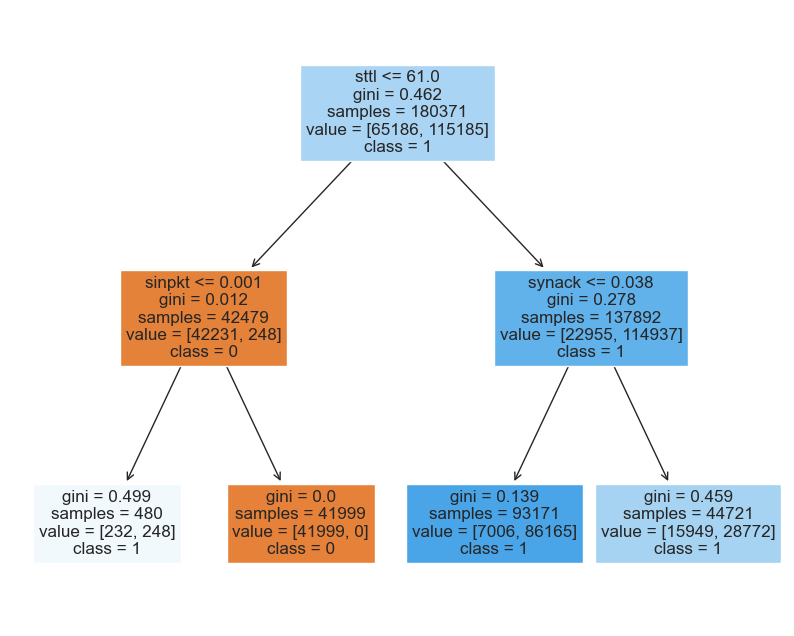

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot decision tree
plt.figure(figsize=(10,8))
plot_tree(clf, feature_names=feature_names, class_names=['0', '1'], filled=True)
plt.show()

In [20]:
# from graphviz import Source
# from IPython.display import display

# dot = Source("digraph {Hello -> World}")
# display(dot)

:::::::> The RULES FOR HIGH RECALL RATE <::::::: 
 |--- sttl <= 61.00
|   |--- sinpkt <= 0.00
|   |   |--- class: 1
|   |--- sinpkt >  0.00
|   |   |--- class: 0
|--- sttl >  61.00
|   |--- synack <= 0.04
|   |   |--- class: 1
|   |--- synack >  0.04
|   |   |--- class: 1



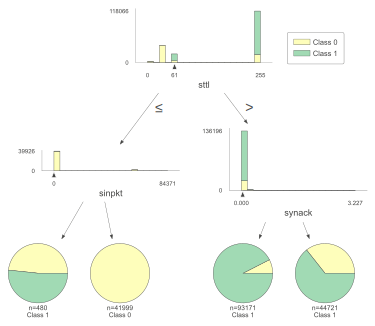

In [21]:
from sklearn.tree import export_text
import dtreeviz

print(":::::::> The RULES FOR HIGH RECALL RATE <::::::: \n" ,export_text(clf,feature_names=feature_names))

viz_model = dtreeviz.model(clf,
                           X_train=X_train, y_train=y_train, 
                           feature_names=feature_names)  
viz_model.view()


In [22]:
X_test = X_test.reset_index(drop=True)

rules= "(sttl <= 61.00 & sinpkt<= 0.00) | (sttl >  61.00 )"

ind = X_test.query(rules).index

X_test_2 = X_test.loc[ind,:]
y_test_2 = y_test[ind]

print(X_test.shape)
print(X_test_2.shape)
print("filtered data" , (1- np.round(X_test_2.shape[0] / X_test.shape[0],2))*100, "%")

(77302, 42)
(59425, 42)
filtered data 23.0 %


In [23]:
from sklearn.metrics import accuracy_score, precision_score

In [35]:
def model_evaluation(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test_2)
    
    accuracy = accuracy_score(y_test_2, y_pred)
    recall = recall_score(y_test_2, y_pred)
    precision = precision_score(y_test_2, y_pred)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Accuracy: ", accuracy)
    
    cross = pd.crosstab(pd.Series(y_test_2, name='Actual'), pd.Series(y_pred, name='Predicted'))
    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
    plt.show()
    
    return {'Recall' : recall, 'Precision': precision, 'Accuracy': accuracy}

In [36]:
results = {}

Recall:  0.9574038150662787
Precision:  0.9647140268360719
Accuracy:  0.9353639040807741


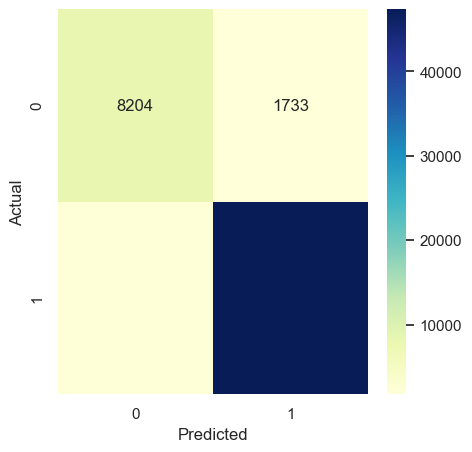

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=11)

results['Random Forest Model'] = model_evaluation(rf)

In [38]:
from sklearn.tree import export_text
feature_names = list(X.columns)

print(export_text(rf.estimators_[99],feature_names=feature_names))

|--- dpkts <= 0.50
|   |--- ct_srv_src <= 2.50
|   |   |--- sbytes <= 53.00
|   |   |   |--- sinpkt <= 30000.02
|   |   |   |   |--- sbytes <= 26.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- sbytes >  26.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- sinpkt >  30000.02
|   |   |   |   |--- class: 0.0
|   |   |--- sbytes >  53.00
|   |   |   |--- rate <= 0.11
|   |   |   |   |--- sbytes <= 62.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- sbytes >  62.50
|   |   |   |   |   |--- sttl <= 143.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- sttl >  143.00
|   |   |   |   |   |   |--- ct_src_dport_ltm <= 1.50
|   |   |   |   |   |   |   |--- sinpkt <= 5037.05
|   |   |   |   |   |   |   |   |--- ct_srv_dst <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- ct_srv_dst >  1.50
|   |   |   |   |   |   |   |   |   |--- sbytes <= 803.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
| 

In [39]:
pip install xgboost # type: ignore

Note: you may need to restart the kernel to use updated packages.


Recall:  0.9517458777885548
Precision:  0.9657774405872583
Accuracy:  0.931729070256626


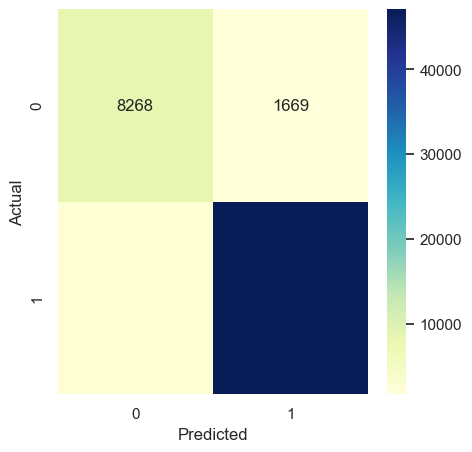

In [41]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

results['XGBoost Classifier'] = model_evaluation(xgbc)

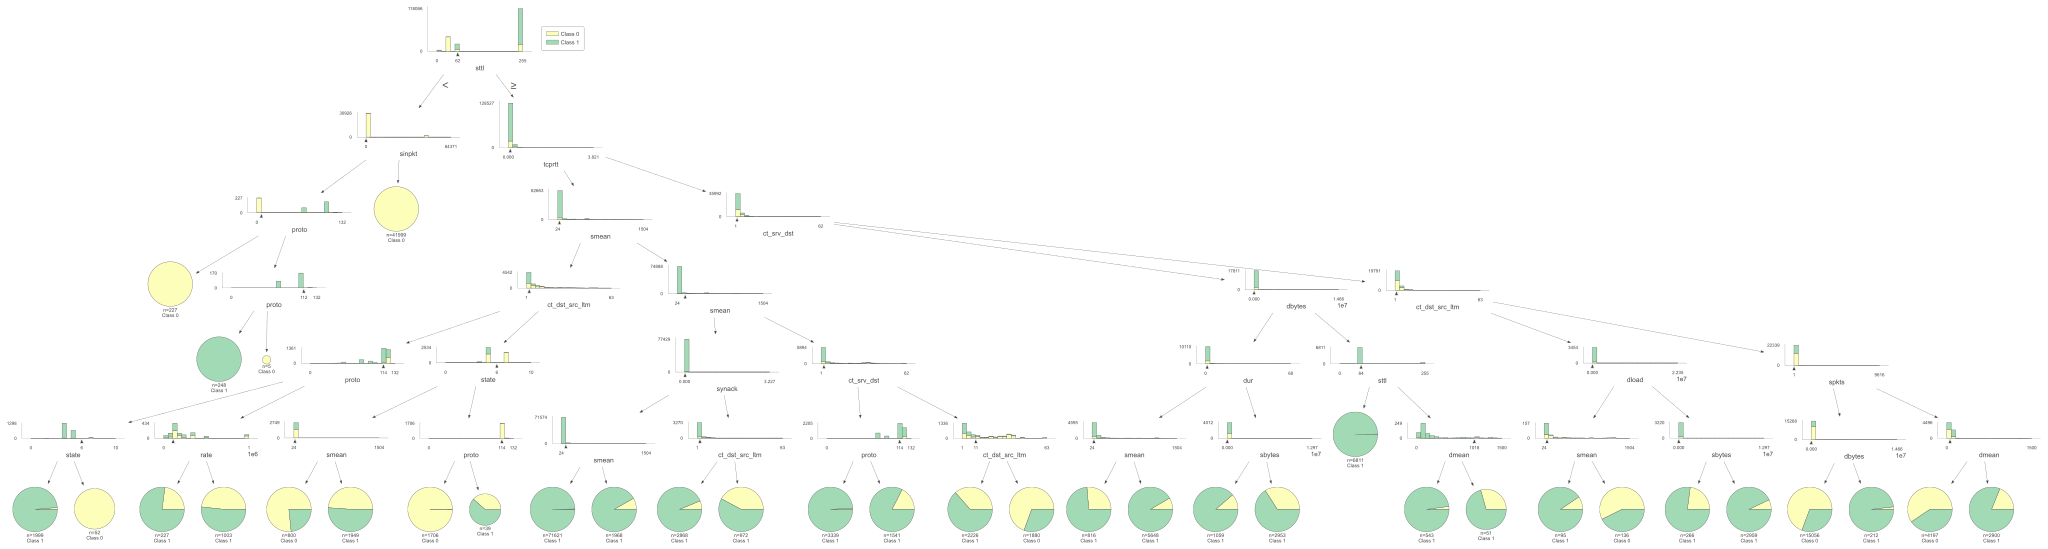

In [42]:
viz_model = dtreeviz.model(xgbc,tree_index=1,
                           X_train=X_train, y_train=y_train, 
                           feature_names=feature_names)  
viz_model.view()

In [53]:
# pip install lightgbm

In [32]:
# from lightgbm import LGBMClassifier

# lgbc = LGBMClassifier()

# results['Light GBM Classifier'] = model_evaluation(lgbc)

In [43]:
comparision = pd.DataFrame(results)
comparision

,Random Forest Model,XGBoost Classifier
Recall,0.957404,0.951746
Precision,0.964714,0.965777
Accuracy,0.935364,0.931729


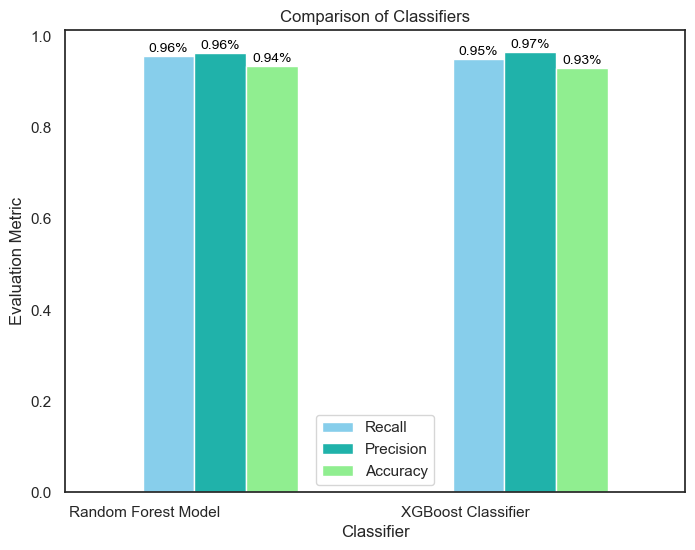

In [51]:
comparison = pd.DataFrame(results)

# Transpose the DataFrame for easier plotting
comparison = comparison.T

colors = ['skyblue', '#20B2AA', 'lightgreen']

# Plot the comparison as a bar graph
ax = comparison.plot(kind='bar', figsize=(8, 6), color=colors)

for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.xlabel('Classifier')
plt.ylabel('Evaluation Metric')
plt.title('Comparison of Classifiers')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

plt.show()

In [67]:
print(df.dtypes)  
print(df.head())

dur                   float64
proto                   int16
service                  int8
state                    int8
spkts                   int64
dpkts                   int64
sbytes                  int64
dbytes                  int64
rate                  float64
sttl                    int64
dttl                    int64
sload                 float64
dload                 float64
sloss                   int64
dloss                   int64
sinpkt                float64
dinpkt                float64
sjit                  float64
djit                  float64
swin                    int64
stcpb                   int64
dtcpb                   int64
dwin                    int64
tcprtt                float64
synack                float64
ackdat                float64
smean                   int64
dmean                   int64
trans_depth             int64
response_body_len       int64
ct_srv_src              int64
ct_state_ttl            int64
ct_dst_ltm              int64
ct_src_dpo

In [60]:
feature_imp = pd.DataFrame({'Name':X.columns, 'Importance':rf.feature_importances_})

feature_imp = feature_imp.sort_values('Importance',ascending=False).reset_index(drop=True)

feature_imp[:10].style.background_gradient()

,Name,Importance
0,sttl,0.124350
1,ct_state_ttl,0.109396
2,rate,0.054975
3,dload,0.052097
4,sload,0.044616
5,sbytes,0.042870
6,ct_dst_src_ltm,0.041234
7,dttl,0.039693
8,smean,0.038556
9,ct_srv_dst,0.037512


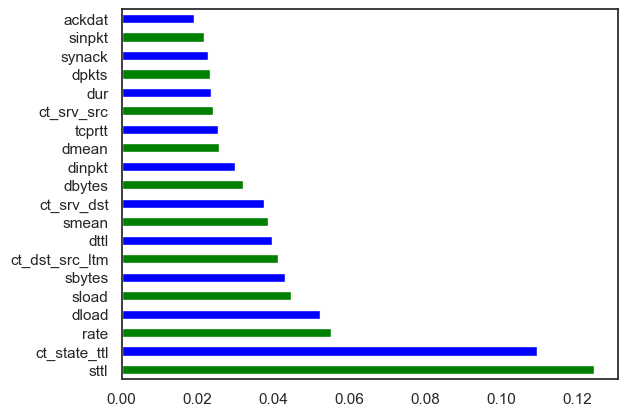

In [62]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color=['g','b']*5)
plt.show()

In [71]:
top10= feature_imp.Name[:10].tolist()
top10

['sttl',
 'ct_state_ttl',
 'rate',
 'dload',
 'sload',
 'sbytes',
 'ct_dst_src_ltm',
 'dttl',
 'smean',
 'ct_srv_dst']

In [72]:
X = df[top10]
y = df['label'].values

rf_top10 = RandomForestClassifier(random_state=11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf_top10.fit(X_train, y_train)

y_pred = rf_top10.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.941760885876174


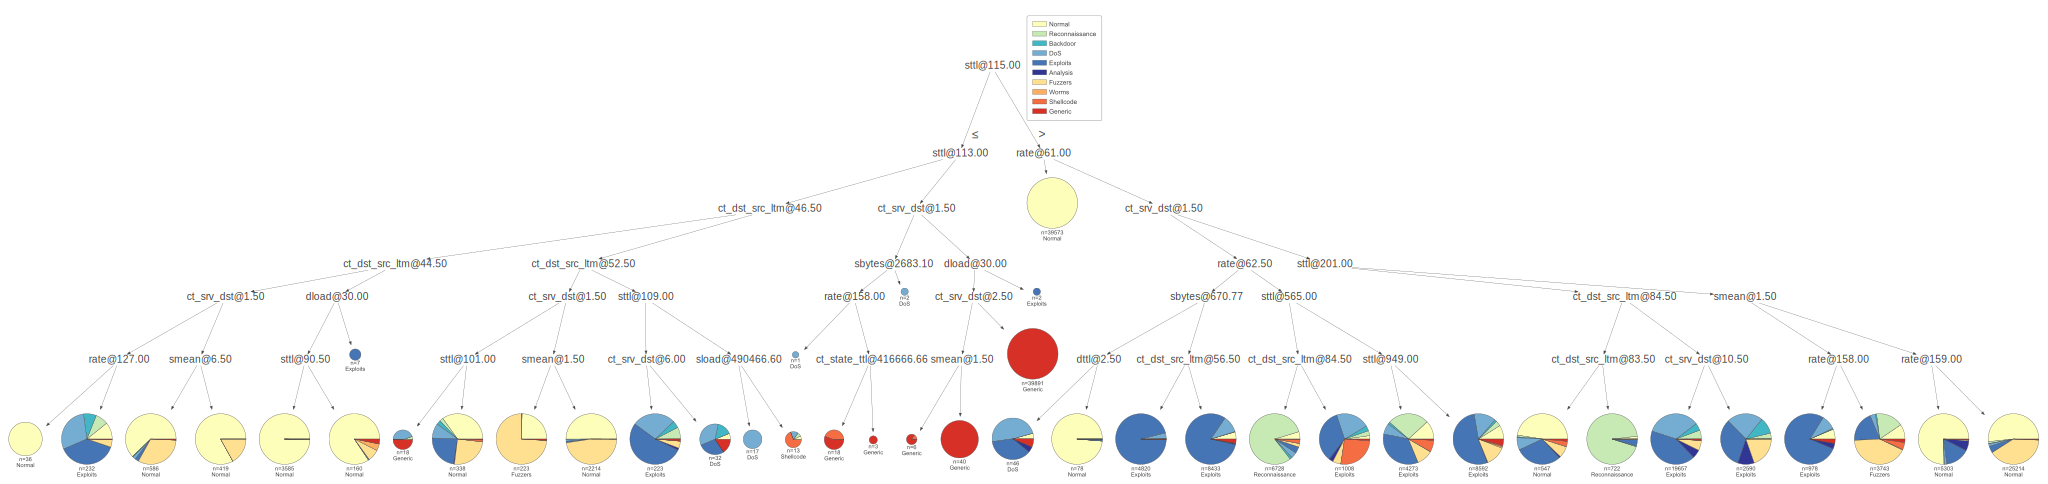

In [73]:
top10= feature_imp.Name[:10].tolist()

attack_names = np.array(df['attack_cat'].unique())

X_top = df.loc[:, df.columns.isin(top10)]
y_top = pd.factorize(df['attack_cat'])[0]


clf_top10 = DecisionTreeClassifier(max_depth=6)

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.3, random_state=11)

clf_top10.fit(X_train_top, y_train_top)

viz_model = dtreeviz.model(clf_top10,
                           X_train=X_train_top, y_train=y_train_top, 
                           class_names=attack_names,
                           feature_names=top10)

viz_model.view(fancy=False,scale=1)

Accuracy:  0.822992936793356


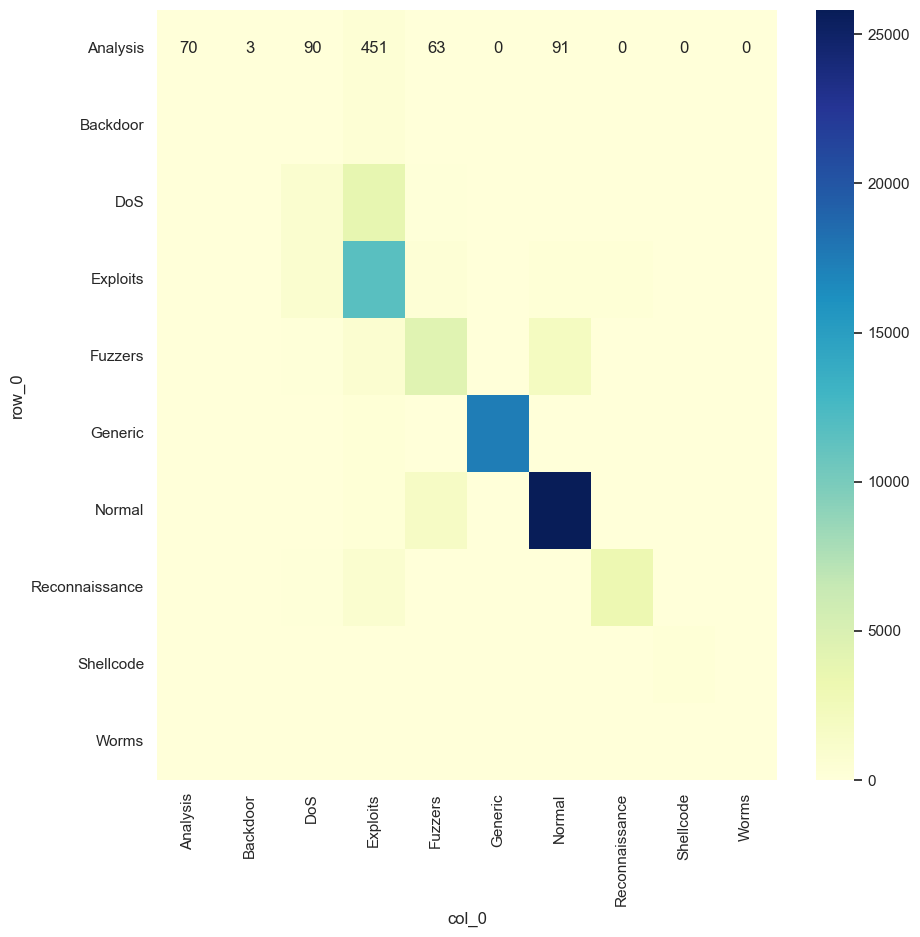

In [76]:
top10= feature_imp.Name[:10].tolist()

X = df.loc[:, df.columns.isin(top10)]

y = df['attack_cat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf = RandomForestClassifier(random_state=11,min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

cross = pd.crosstab(y_test,  y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

      Analysis       0.82      0.09      0.16       768
      Backdoor       0.55      0.07      0.13       658
           DoS       0.38      0.17      0.23      4909
      Exploits       0.63      0.87      0.73     13403
       Fuzzers       0.65      0.60      0.63      7283
       Generic       1.00      0.98      0.99     17790
        Normal       0.91      0.93      0.92     27814
Reconnaissance       0.91      0.75      0.82      4198
     Shellcode       0.61      0.57      0.59       418
         Worms       0.68      0.52      0.59        61

      accuracy                           0.82     77302
     macro avg       0.71      0.56      0.58     77302
  weighted avg       0.82      0.82      0.81     77302



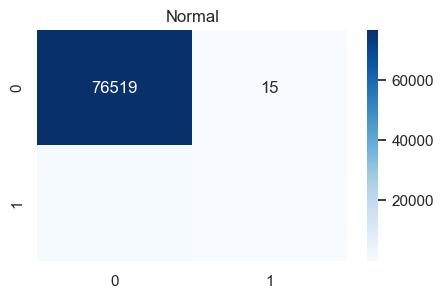

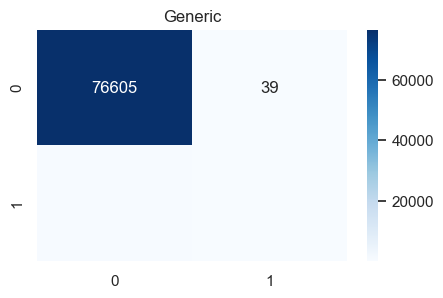

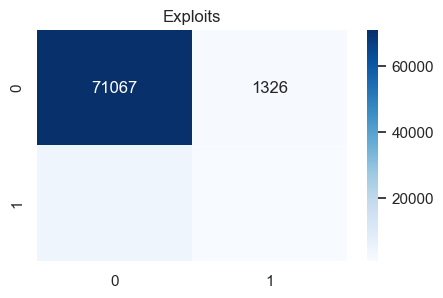

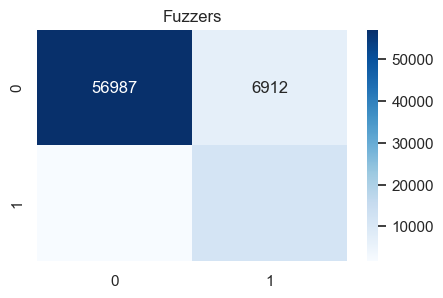

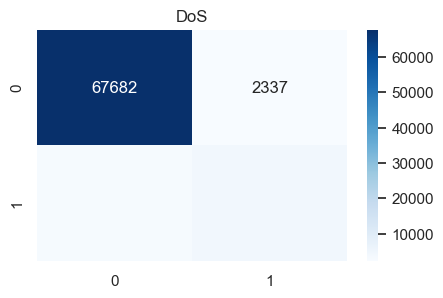

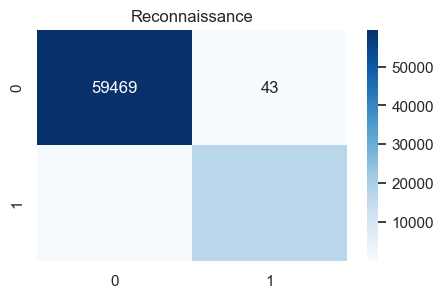

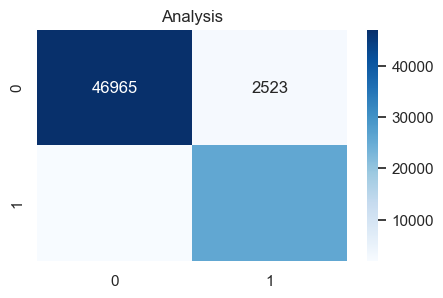

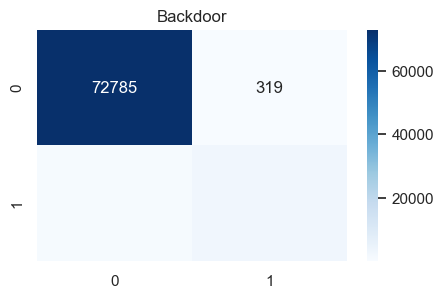

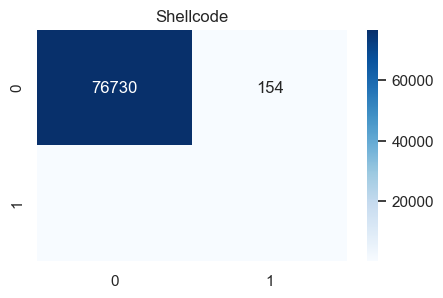

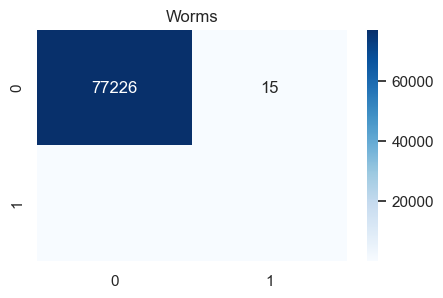

In [82]:
from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(y_test,y_pred)
for i,j in zip(mcm,df['attack_cat'].value_counts().index):
    plt.subplots(figsize = (5,3))
    sns.heatmap(i,annot=True,fmt = 'd',cmap = "Blues")
    plt.title(j)